# Analysis

In this notebook, we'll explore the two datasets and try to draw correlation among the two.

## Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from shapely.geometry import Point, Polygon

## Load datasets

In [2]:
precipitation_data = pd.read_csv("data/combined_data.csv")
province_data = pd.read_csv("zika_data/places.csv")

## Plot precipitation data

(-76.53586699788056,
 -51.06413147624051,
 -58.395867798966975,
 -18.40413143809355)

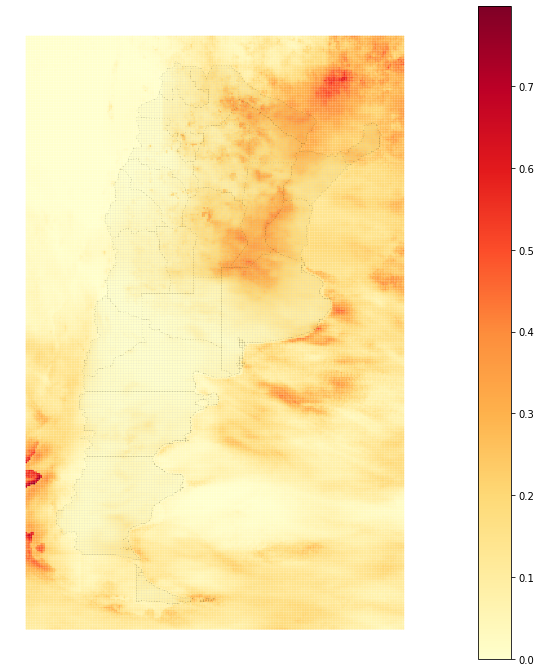

In [3]:
import geopandas as gpd
import descartes
from shapely.geometry import Point

temp_df = precipitation_data[(precipitation_data["year"] == 2016) & (precipitation_data["month"] == 12)]
lat  = temp_df["latitude"]
lon  = temp_df["longitude"]
data = temp_df["precipitation"]

data_points = [Point(xy) for xy in zip(lon, lat)]

world = gpd.read_file("shapefiles/ARG_adm1.shp")
ax = world.plot(color = 'lightgrey', linewidth = 0.5, edgecolor = 'black', figsize = (20, 12))

geo_df = gpd.GeoDataFrame(temp_df, crs = {'init': 'epsg:4326'}, geometry = data_points)
geo_df.plot(column = 'precipitation', markersize = 1, ax = ax, legend=True, cmap='YlOrRd')

ax.axis('off')